# Classifição - Machine Learning

## Dataset - Spotify Hits

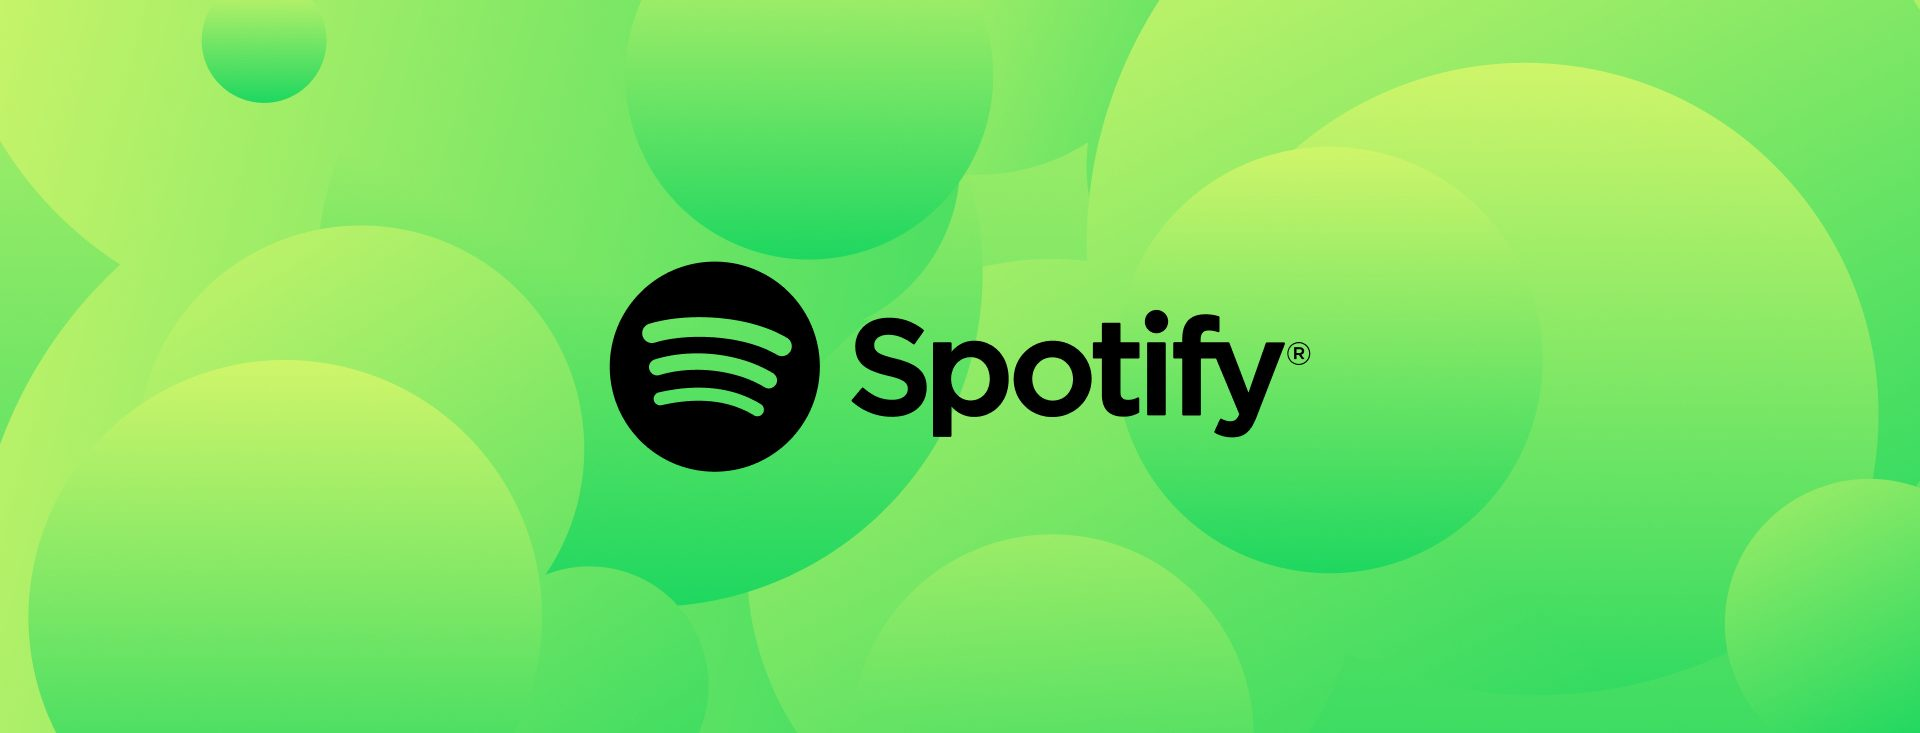

In [29]:
import pandas as pd
import numpy as np

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df_90 = pd.read_csv("/content/drive/MyDrive/Aulas - DS/dados/dataset-of-90s.csv")
df_00 = pd.read_csv("/content/drive/MyDrive/Aulas - DS/dados/dataset-of-00s.csv")
df_10 = pd.read_csv("/content/drive/MyDrive/Aulas - DS/dados/dataset-of-10s.csv")

In [33]:
df = pd.concat([
    df_90,
    df_00,
    df_10
])

In [34]:
df.head()

track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm         0.527   0.316    1   -15.769   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN         0.738   0.541    1    -5.485   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi         0.736   0.419    0   -10.662   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x         0.565   0.594    5   -13.086   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4         0.513   0.760    4   -10.077   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0310      0.693000           0.00699    0.1680    0.543   
1     1       0.0311      0.559000           0.00000    0.0492    0.309   
2     1       0.0300      0.693000           0.49500    0.0809    0.265   
3     1       0.0646      0.655000           0.92600    0.6750    0.763   
4     1       0.0355      0.000017           0.00339    0.1530    0.961   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  116.211       158840               4    53.89523         6       0  
1  134.187       387573               4    32.16853        16       1  
2   93.982       237267               4    42.05369         9       0  
3  114.219       375933               4    80.99693        10       0  
4  153.166       430653               4    25.57331        20       0

In [35]:
df.shape

(17790, 19)

In [36]:
df["target"].isnull().sum()

0

In [37]:
df["target"].value_counts(normalize=True) * 100

target
0    50.0
1    50.0
Name: proportion, dtype: float64

In [38]:
df = df.drop_duplicates()

In [39]:
df["target"].value_counts(normalize=True) * 100

target
0    50.491003
1    49.508997
Name: proportion, dtype: float64

In [40]:
df.groupby(["track", "artist"]).size().sort_values(ascending=False)

track                               artist                             
Falling                             Julee Cruise                           12
Chebika - Claudio Mate Metal Remix  Stefano Patarnello                      8
Feeling Punk - Asle Remix           Todd Terry                              6
Until the Day I Die                 Story Of The Year                       5
Spiegel im Spiegel                  Arvo Pärt                               5
                                                                           ..
Haunt Your House                    Dan Andriano in the Emergency Room      1
Haunted Gate                        David Toop                              1
Havana                              Camila Cabello Featuring Young Thug     1
                                    Kenny G                                 1
雏鹰                                  窒息                                      1
Length: 17362, dtype: int64

In [41]:
df = df.drop_duplicates(subset=["track", "artist"])

In [42]:
df.shape

(17362, 19)

In [43]:
df["target"].value_counts(normalize=True) * 100

target
1    50.224628
0    49.775372
Name: proportion, dtype: float64

### Features

In [ ]:
df.head()

track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm         0.527   0.316    1   -15.769   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN         0.738   0.541    1    -5.485   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi         0.736   0.419    0   -10.662   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x         0.565   0.594    5   -13.086   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4         0.513   0.760    4   -10.077   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0310      0.693000           0.00699    0.1680    0.543   
1     1       0.0311      0.559000           0.00000    0.0492    0.309   
2     1       0.0300      0.693000           0.49500    0.0809    0.265   
3     1       0.0646      0.655000           0.92600    0.6750    0.763   
4     1       0.0355      0.000017           0.00339    0.1530    0.961   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  116.211       158840               4    53.89523         6       0  
1  134.187       387573               4    32.16853        16       1  
2   93.982       237267               4    42.05369         9       0  
3  114.219       375933               4    80.99693        10       0  
4  153.166       430653               4    25.57331        20       0

In [ ]:
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [ ]:
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [ ]:
df.describe()

danceability        energy           key      loudness          mode  \
count  17362.000000  17362.000000  17362.000000  17362.000000  17362.000000   
mean       0.559860      0.655534      5.269036     -8.368586      0.652632   
std        0.187469      0.246079      3.563331      5.302304      0.476148   
min        0.057600      0.000251      0.000000    -49.253000      0.000000   
25%        0.438000      0.505000      2.000000     -9.919000      0.000000   
50%        0.577000      0.699000      5.000000     -6.913500      1.000000   
75%        0.697000      0.856000      8.000000     -5.036000      1.000000   
max        0.986000      0.999000     11.000000      1.137000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  17362.000000  17362.000000      17362.000000  17362.000000   
mean       0.088807      0.240249          0.157978      0.196683   
std        0.092832      0.307832          0.308222      0.167195   
min        0.022000      0.000000          0.000000      0.013000   
25%        0.035700      0.009080          0.000000      0.093800   
50%        0.050400      0.082700          0.000044      0.128000   
75%        0.096700      0.378750          0.058800      0.257000   
max        0.956000      0.996000          0.998000      0.992000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  17362.000000  17362.000000  1.736200e+04    17362.000000  17362.000000   
mean       0.485989    121.053226  2.494776e+05        3.923050     40.964088   
std        0.255124     29.909889  1.119149e+05        0.378197     19.964160   
min        0.000000     34.535000  1.592000e+04        0.000000      0.000000   
25%        0.278250     97.149000  1.997632e+05        4.000000     27.902563   
50%        0.487000    119.876000  2.331265e+05        4.000000     36.271890   
75%        0.690000    140.003000  2.763132e+05        4.000000     48.324433   
max        0.996000    217.872000  4.170227e+06        5.000000    262.615400   

           sections        target  
count  17362.000000  17362.000000  
mean      10.795473      0.502246  
std        4.744401      0.500009  
min        1.000000      0.000000  
25%        8.000000      0.000000  
50%       10.000000      1.000000  
75%       12.000000      1.000000  
max      169.000000      1.000000

In [ ]:
import seaborn as sns

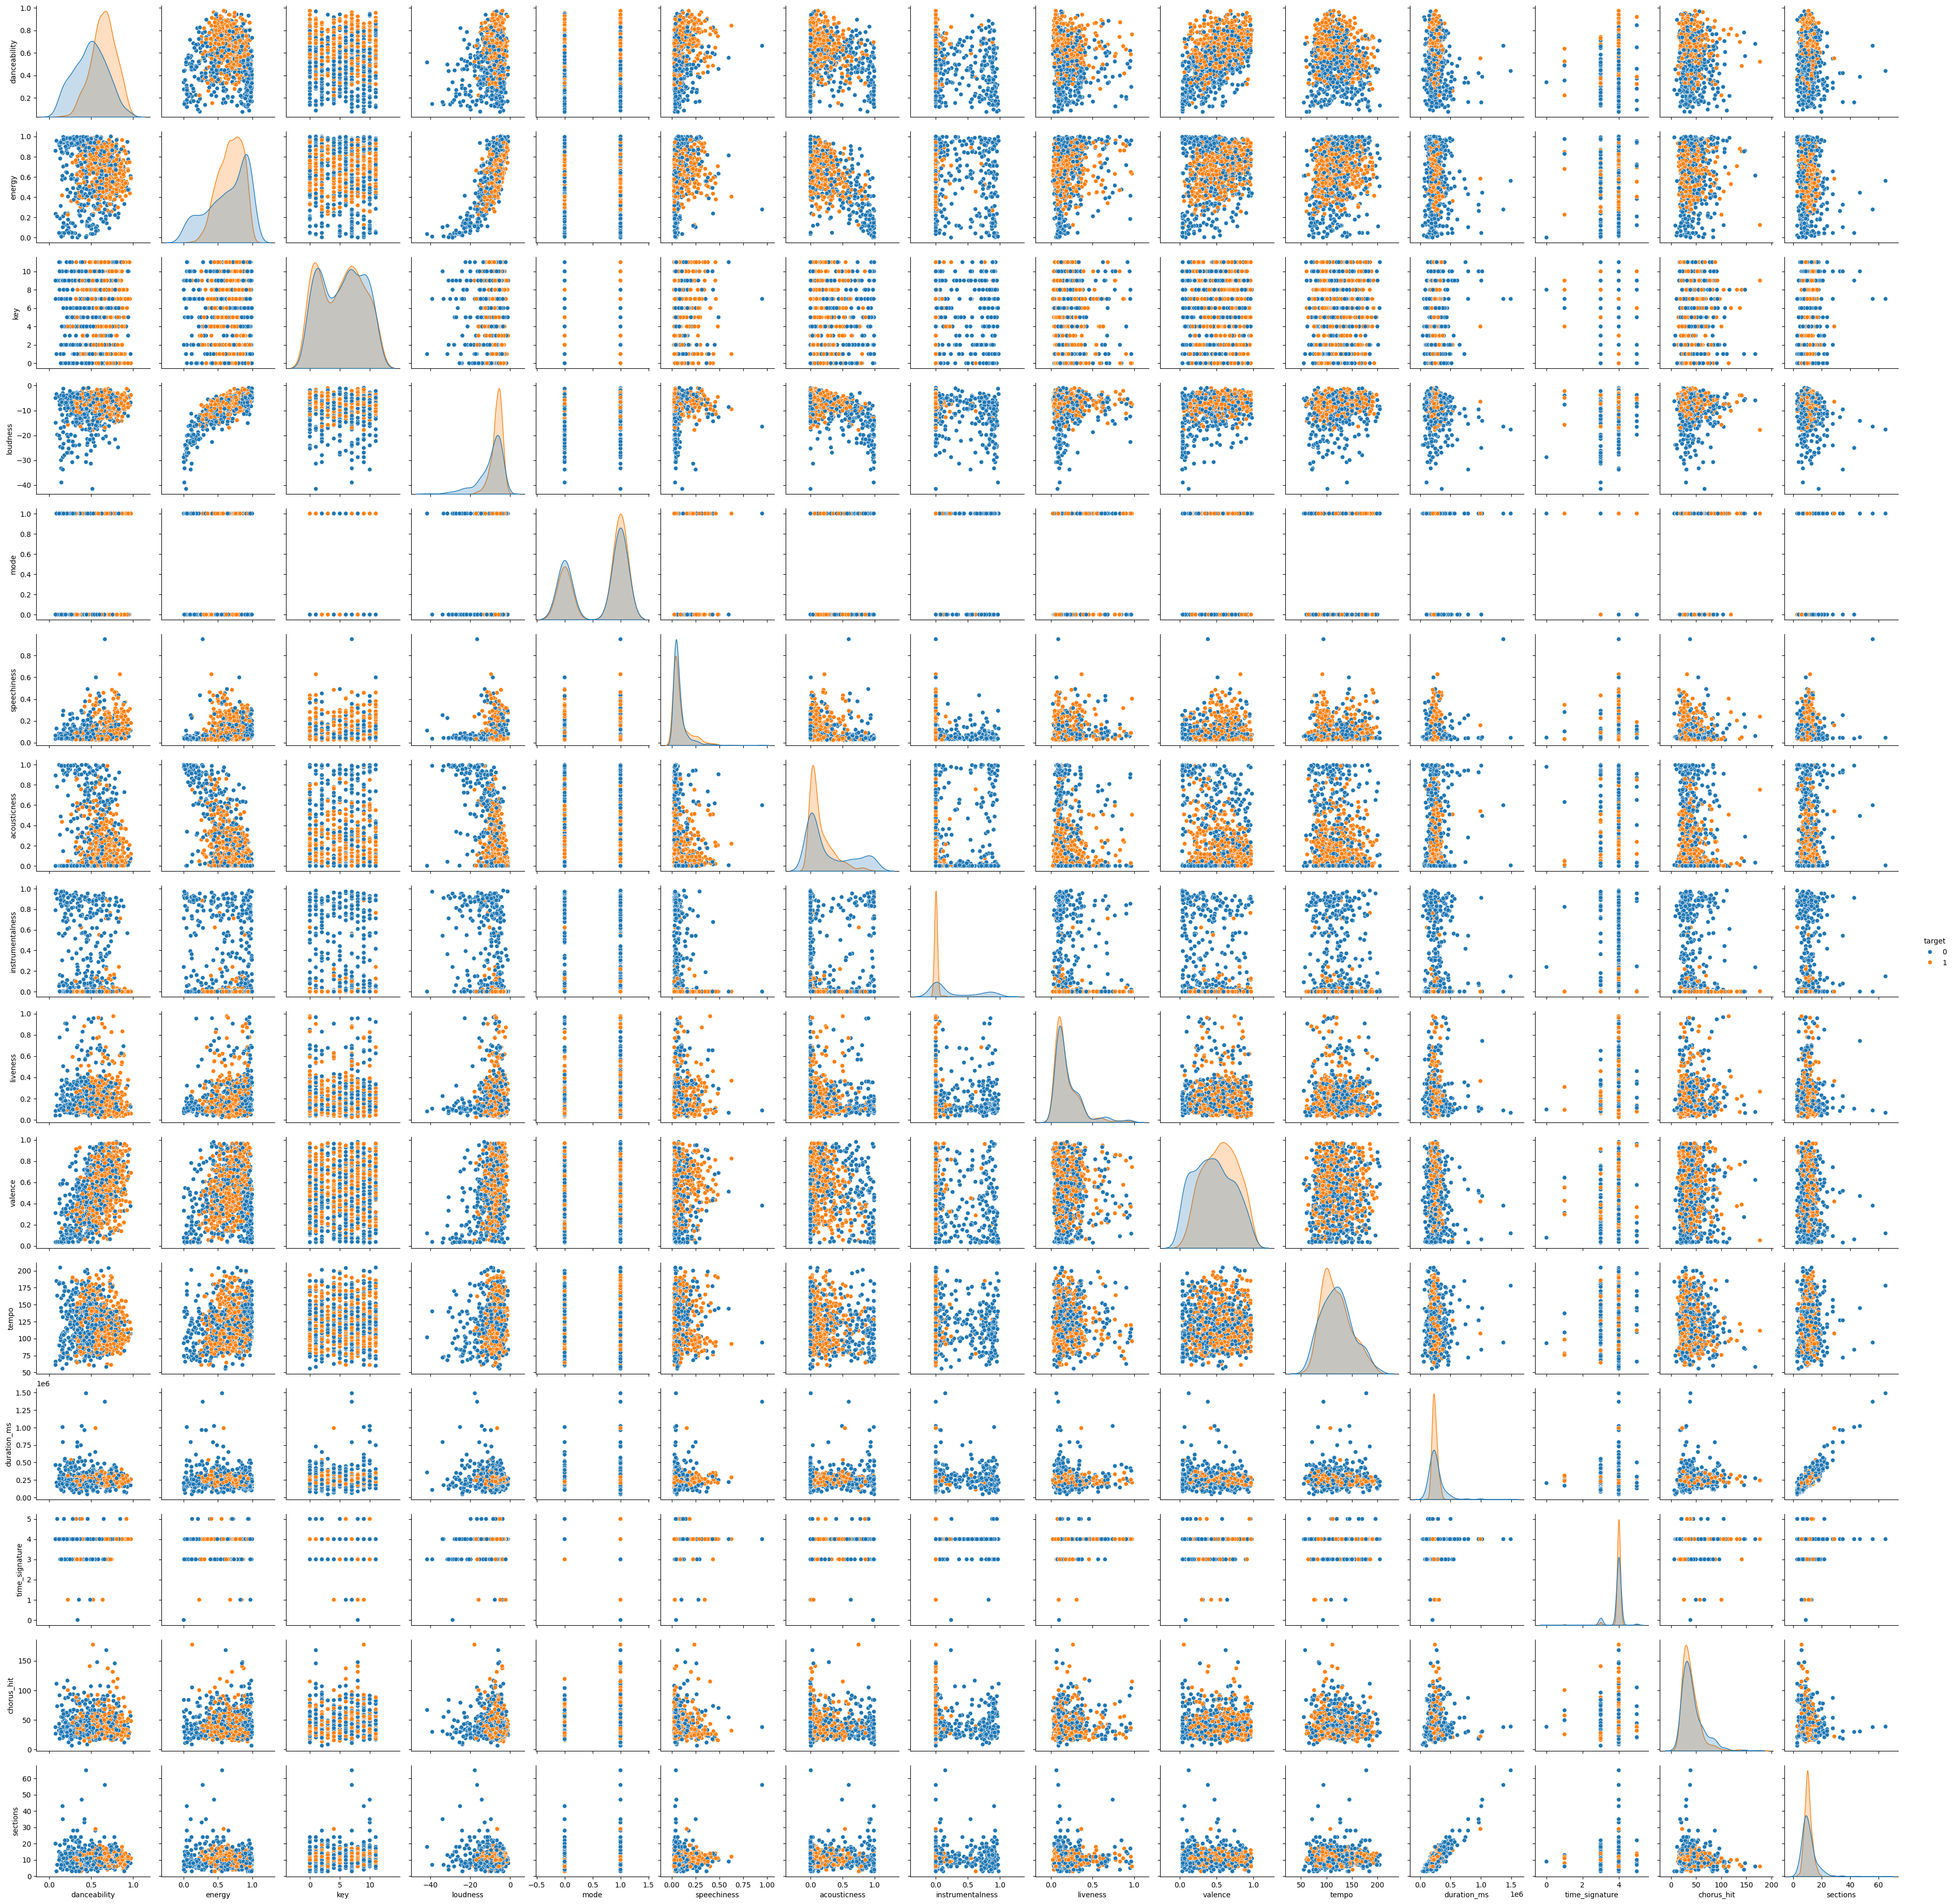

In [ ]:
sns.pairplot(df.sample(1000), hue="target")

### Separação de Dados

In [47]:
X = df.drop(["track",	"artist",	"uri", "target"], axis=1)
y = df["target"]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (12153, 15)
Test: (5209, 15)


### Validação Cruzada (k-Fold)

In [46]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# Exemplo com cross_val_score

from sklearn.model_selection import cross_val_score


# TODO: Criar o modelo
# ...


scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') # Precisa criar o modelo antes para funcionar

# Resultados
print(f"Scores por fold: {scores}")
print(f"Score médio: {scores.mean():.2f}")

In [59]:
# Exemplo com KFold

from sklearn.model_selection import KFold
# Configurar o KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar o modelo manualmente
scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("##### Fold ######")
    print("Train index", train_index)
    print("Test index", test_index)
    print("\n")

    # TODO: Criar o modelo, treinar, fazer predicao e avaliar
		# ...
    fold_result = 0 # Trocar por resultado da avaliação

    scores.append(fold_result)


print(f"Scores por fold: {scores}")
print(f"Score médio: {sum(scores) / len(scores):.2f}")

##### Fold ######
Train index [    0     1     2 ... 17356 17359 17361]
Test index [    3     5     8 ... 17357 17358 17360]


##### Fold ######
Train index [    1     2     3 ... 17359 17360 17361]
Test index [    0    15    17 ... 17335 17340 17349]


##### Fold ######
Train index [    0     1     2 ... 17359 17360 17361]
Test index [    4    10    12 ... 17317 17341 17346]


##### Fold ######
Train index [    0     1     3 ... 17359 17360 17361]
Test index [    2     6    18 ... 17354 17355 17356]


##### Fold ######
Train index [    0     2     3 ... 17357 17358 17360]
Test index [    1     7     9 ... 17348 17359 17361]


Scores por fold: [0, 0, 0, 0, 0]
Score médio: 0.00


### Métricas de avaliação

In [21]:
# Listas de valores reais e previstos
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # Valores reais
y_pred = [1, 0, 1, 0, 0, 1, 0, 0, 0, 1]  # Valores previstos

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Exibir resultados
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.70
Precisão: 0.75
Recall: 0.60
F1-Score: 0.67


Text(0.5, 1.0, 'Confusion Matrix')

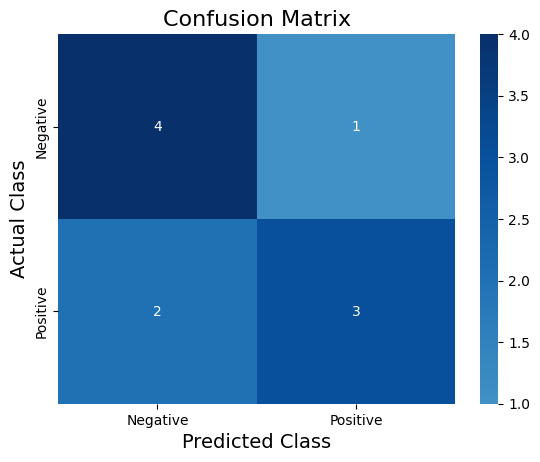

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, center = 0, annot=True,
            xticklabels = ["Negative", "Positive"], cmap= "Blues", yticklabels = ["Negative", "Positive"])


plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

### Preparando os Dados

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (12153, 15)
Test: (5209, 15)


In [65]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Modelagem

In [67]:
from sklearn.metrics import classification_report

### Regressão Logística

In [66]:
from sklearn.linear_model import LogisticRegression

# Treinar o modelo de Regressão Logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.79

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      2606
           1       0.75      0.88      0.81      2603

    accuracy                           0.79      5209
   macro avg       0.80      0.79      0.79      5209
weighted avg       0.80      0.79      0.79      5209



### k-NN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.78

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      2606
           1       0.75      0.86      0.80      2603

    accuracy                           0.78      5209
   macro avg       0.79      0.78      0.78      5209
weighted avg       0.79      0.78      0.78      5209



In [69]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      2606
           1       0.74      0.88      0.81      2603

    accuracy                           0.79      5209
   macro avg       0.80      0.79      0.79      5209
weighted avg       0.80      0.79      0.79      5209



### Árvore de Decisão

In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2606
           1       0.75      0.76      0.75      2603

    accuracy                           0.75      5209
   macro avg       0.75      0.75      0.75      5209
weighted avg       0.75      0.75      0.75      5209



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2606
           1       0.78      0.86      0.82      2603

    accuracy                           0.81      5209
   macro avg       0.81      0.81      0.81      5209
weighted avg       0.81      0.81      0.81      5209



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2606
           1       0.81      0.88      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=42)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2606
           1       0.81      0.88      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.84      0.83      0.83      5209
weighted avg       0.84      0.83      0.83      5209



In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=42)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2606
           1       0.81      0.88      0.84      2603

    accuracy                           0.84      5209
   macro avg       0.84      0.84      0.84      5209
weighted avg       0.84      0.84      0.84      5209



### Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2606
           1       0.79      0.89      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



In [ ]:
model = GradientBoostingClassifier(random_state=42, n_estimators=200)
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2606
           1       0.80      0.89      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.84      0.83      0.83      5209
weighted avg       0.84      0.83      0.83      5209



In [ ]:
model = GradientBoostingClassifier(random_state=42, learning_rate=0.05)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      2606
           1       0.79      0.89      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



### Rede Neural (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      2606
           1       0.79      0.90      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



In [ ]:
(100, 100)

(100, 100)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,),  activation="tanh", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2606
           1       0.77      0.91      0.83      2603

    accuracy                           0.82      5209
   macro avg       0.83      0.82      0.82      5209
weighted avg       0.83      0.82      0.82      5209



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
### Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_proba = model.predict_proba(X_test)

In [ ]:
y_proba[:, 1]

array([0.02201053, 0.29246471, 0.05553485, ..., 0.10701688, 0.50735984,
       0.00543395])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,  y_proba[:, 1])

In [ ]:
 auc_roc = auc(fpr, tpr)
 auc_roc

0.884097662859638

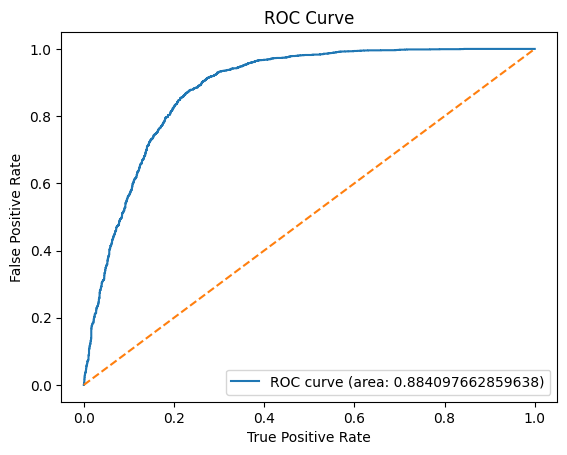

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr,   tpr,  label=f"ROC curve (area: {auc_roc})")

plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.show()

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,),  activation="relu", random_state=42, max_iter=400)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2606
           1       0.81      0.86      0.83      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



### Avaliando as iterações ao longo do aprendizado da Rede Neural

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [ ]:
model  = MLPClassifier(max_iter=1, warm_start=True, random_state=42)
max_iterations = 1000

accuracy_val_results = []
accuracy_train_results = []

for iter in range(max_iterations):
  model.fit(X_train,  y_train)

  y_pred_val = model.predict(X_val)
  y_pred_train = model.predict(X_train)

  accuracy_val = accuracy_score(y_val, y_pred_val)
  accuracy_val_results.append(accuracy_val)

  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_train_results.append(accuracy_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

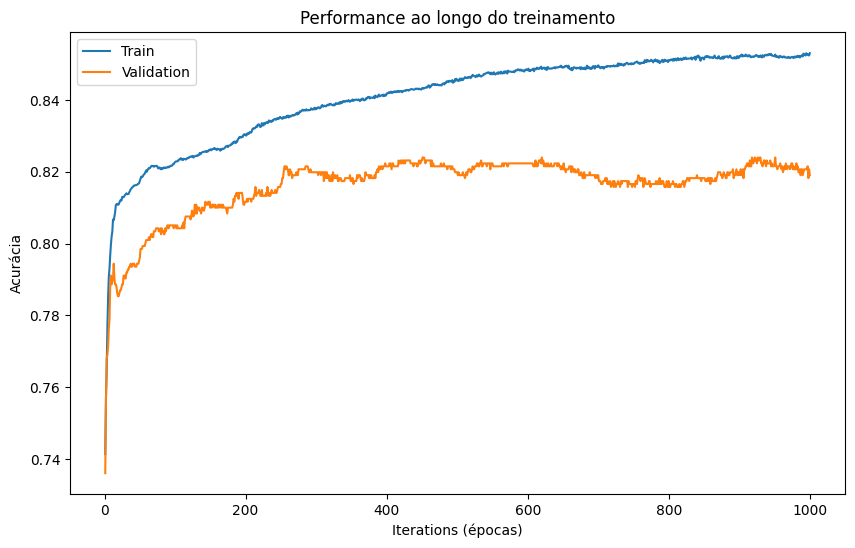

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, max_iterations +1), accuracy_train_results, label="Train")
plt.plot(range(1, max_iterations +1), accuracy_val_results, label="Validation")

plt.xlabel("Iterations (épocas)")
plt.ylabel("Acurácia")

plt.title("Performance ao longo do treinamento")

plt.legend()
plt.show()

### Comparando os modelos
 Utilizando Validação Cruzada

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Grandient Boosting": GradientBoostingClassifier(random_state=42),
    "Nueral Network" : MLPClassifier(random_state=42)
}

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
results_mean = []
results_std = []
results_names = []

for model_name, model in models.items():
  print(model_name)

  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

  results_mean.append(cv_scores.mean())
  results_std.append(cv_scores.std())
  results_names.append(model_name)

Logistic Regression
k-NN
Decision Tree
Random Forest
Grandient Boosting
Nueral Network


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
df_results = pd.DataFrame({
    "Modelo": results_names,
    "Acurácia Média": results_mean,
    "Acurácia Std" : results_std
})

df_results

Modelo  Acurácia Média  Acurácia Std
0  Logistic Regression        0.794734      0.007753
1                 k-NN        0.782482      0.005086
2        Decision Tree        0.757703      0.010825
3        Random Forest        0.834874      0.008698
4   Grandient Boosting        0.833593      0.010082
5       Nueral Network        0.820793      0.008514

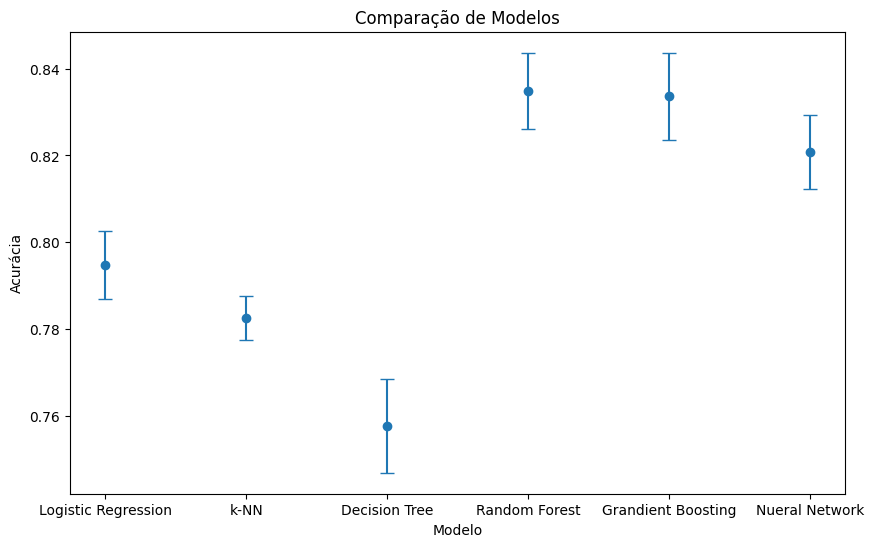

In [ ]:
plt.figure(figsize=(10,6))
plt.errorbar(df_results["Modelo"], df_results["Acurácia Média"], yerr=df_results["Acurácia Std"], fmt="o", capsize=5)
plt.ylabel("Acurácia")
plt.xlabel("Modelo")
plt.title("Comparação de Modelos")
plt.show()

## Tuning de Hiperparametros

### Grid Search

In [ ]:
k_list = [1, 3, 5, 7, 9, 15, 21, 25]

In [ ]:
results = []

for k in k_list:
  scores = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring="accuracy")
  results.append({
      "k": k,
      "accuracia": scores.mean()
      })

In [ ]:
results

[{'k': 1, 'accuracia': 0.7389602763211899},
 {'k': 3, 'accuracia': 0.7691327513669356},
 {'k': 5, 'accuracia': 0.7824822430031539},
 {'k': 7, 'accuracia': 0.7886073515680575},
 {'k': 9, 'accuracia': 0.7908020971521095},
 {'k': 15, 'accuracia': 0.796470836060517},
 {'k': 21, 'accuracia': 0.7972931290014369},
 {'k': 25, 'accuracia': 0.7959220974196034}]

In [ ]:
df_results_knn = pd.DataFrame(results)

In [ ]:
df_results_knn

k  accuracia
0   1   0.738960
1   3   0.769133
2   5   0.782482
3   7   0.788607
4   9   0.790802
5  15   0.796471
6  21   0.797293
7  25   0.795922

<Axes: xlabel='k', ylabel='accuracia'>

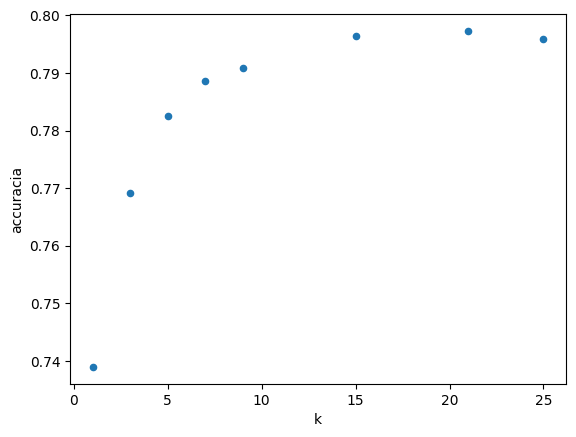

In [ ]:
df_results_knn.plot(x="k", y="accuracia", kind="scatter")

In [ ]:
criterion_list = ["gini", "entropy"]
max_depth_list = [None,  3, 5, 7, 10, 15]
min_samples_split_list =  [2, 6, 20]

In [ ]:
count = 0
for criterion in criterion_list:
  for max_depth in max_depth_list:
    for min_samples_split in min_samples_split_list:
      print(f"criterion {criterion}, max_depht {max_depth}, min_sample_spliot {min_samples_split}")
      count = count +  1


print("Count: ", count)

criterion gini, max_depht None, min_sample_spliot 2
criterion gini, max_depht None, min_sample_spliot 6
criterion gini, max_depht None, min_sample_spliot 20
criterion gini, max_depht 3, min_sample_spliot 2
criterion gini, max_depht 3, min_sample_spliot 6
criterion gini, max_depht 3, min_sample_spliot 20
criterion gini, max_depht 5, min_sample_spliot 2
criterion gini, max_depht 5, min_sample_spliot 6
criterion gini, max_depht 5, min_sample_spliot 20
criterion gini, max_depht 7, min_sample_spliot 2
criterion gini, max_depht 7, min_sample_spliot 6
criterion gini, max_depht 7, min_sample_spliot 20
criterion gini, max_depht 10, min_sample_spliot 2
criterion gini, max_depht 10, min_sample_spliot 6
criterion gini, max_depht 10, min_sample_spliot 20
criterion gini, max_depht 15, min_sample_spliot 2
criterion gini, max_depht 15, min_sample_spliot 6
criterion gini, max_depht 15, min_sample_spliot 20
criterion entropy, max_depht None, min_sample_spliot 2
criterion entropy, max_depht None, min_sam

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5, 7, 10, 15],
    "min_samples_split": [2, 6, 20]
}

In [ ]:
model = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 6, 20]},
             scoring='accuracy')

In [ ]:
grid.best_score_

0.8077162374643585

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 20}

In [ ]:
df_results_tree = pd.DataFrame(grid.cv_results_)

<Axes: >

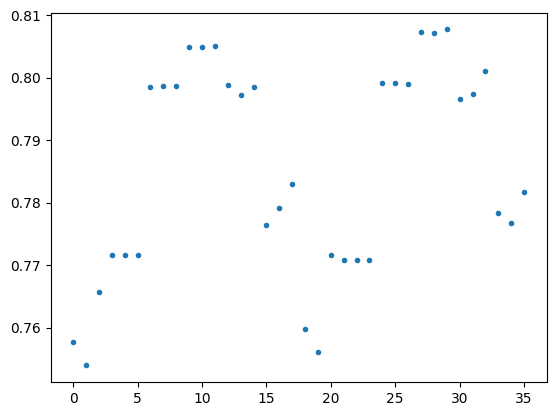

In [ ]:
df_results_tree["mean_test_score"].plot(style=".")

### Random Search

In [ ]:
 from scipy.stats import uniform, randint

In [ ]:
param_dist_gb = {
    "n_estimators": randint(50, 500),
    "subsample": uniform(0.5, 0.5),
    "max_depth": randint( 3, 10),
    "min_samples_split": randint(2, 20)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = GradientBoostingClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(model, param_dist_gb, n_iter=20, cv=5, scoring="accuracy", random_state=42, n_jobs=-1)

In [1]:
random_search.fit(X_train, y_train)

In [ ]:
random_search.best_score_

0.8355131577737487

In [ ]:
random_search.best_params_

{'max_depth': 5,
 'min_samples_split': 12,
 'n_estimators': 137,
 'subsample': 0.8337086111390218}

In [ ]:
df_results_gb = pd.DataFrame(random_search.cv_results_)

In [ ]:
df_results_gb.shape

(20, 17)

## Dados Desbalanceados - US Accidents Dataset

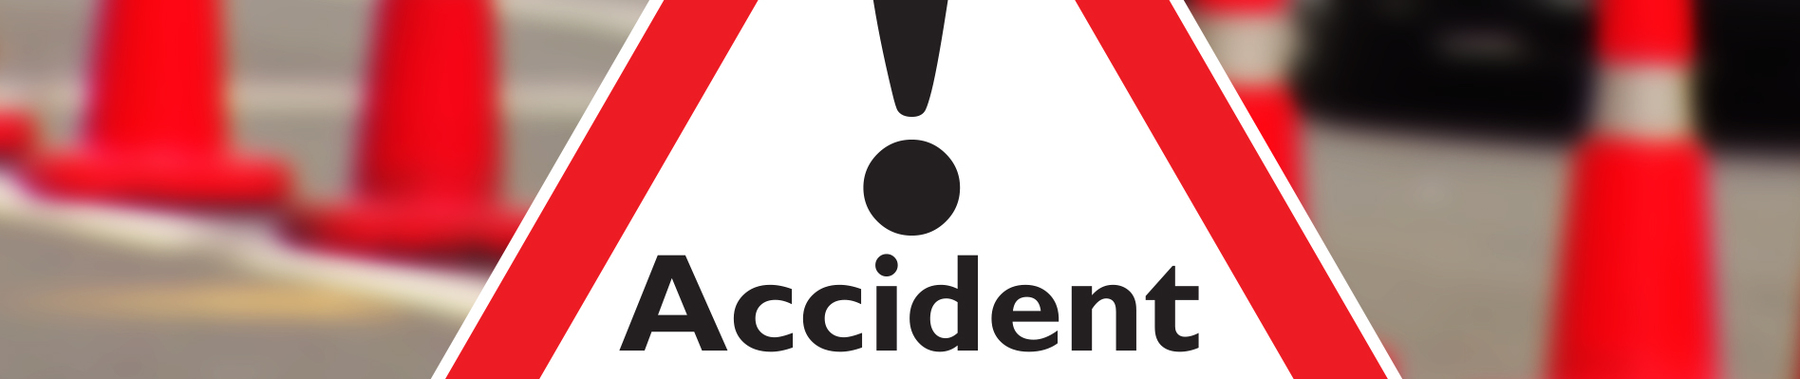

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Aulas - DS/dados/US_Accidents.csv")

In [ ]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], format="%d-%m-%Y %H:%M", errors="coerce")

In [ ]:
df = df[df["Start_Time"].dt.year.isin([2017])]

In [ ]:
# Transformando o target em uma classificação binária (indicando se foi grave ou não)
df["High_Severity"] = df["Severity"].apply(lambda x: 1 if x >= 3 else 0)

<ipython-input-89-54d9133db853>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["High_Severity"] = df["Severity"].apply(lambda x: 1 if x >= 3 else 0)


In [ ]:
df["High_Severity"].value_counts(normalize=True)

High_Severity
0    0.692745
1    0.307255
Name: proportion, dtype: float64

In [ ]:
features = [
  'Start_Lat',
  'Start_Lng',
  'End_Lat',
  'End_Lng',
  'Distance(mi)',
  'Temperature(F)',
  'Wind_Chill(F)',
  'Humidity(%)',
  'Pressure(in)',
  'Visibility(mi)',
  'Wind_Speed(mph)',
  'Precipitation(in)'
]

target = "High_Severity"

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X = X.fillna(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     22530
           1       0.71      0.51      0.60      9873

    accuracy                           0.79     32403
   macro avg       0.76      0.71      0.73     32403
weighted avg       0.78      0.79      0.78     32403



### Random Oversampleing

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversampler = RandomOverSampler(random_state=42)

X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

In [ ]:
y_train_over.value_counts(normalize=True)

High_Severity
1    0.5
0    0.5
Name: proportion, dtype: float64

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_over, y_train_over)

y_pred = model.predict(X_test)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     22530
           1       0.66      0.58      0.62      9873

    accuracy                           0.78     32403
   macro avg       0.74      0.73      0.73     32403
weighted avg       0.78      0.78      0.78     32403



### Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [ ]:
y_train_under.value_counts(normalize=True)

High_Severity
0    0.5
1    0.5
Name: proportion, dtype: float64

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train_under, y_train_under)

y_pred = model.predict(X_test)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78     22530
           1       0.53      0.75      0.62      9873

    accuracy                           0.72     32403
   macro avg       0.70      0.73      0.70     32403
weighted avg       0.76      0.72      0.73     32403



In [ ]:
y_train.shape

(75605,)

In [ ]:
y_train_over.shape

(104584,)

In [ ]:
y_train_under.shape

(46626,)

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote_sampler = SMOTE(random_state=42)
X_train_smote,  y_train_smote = smote_sampler.fit_resample(X_train, y_train)

In [ ]:
 model = RandomForestClassifier(random_state=42)
 model.fit(X_train_smote, y_train_smote)

 y_pred = model.predict(X_test)
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83     22530
           1       0.60      0.66      0.63      9873

    accuracy                           0.76     32403
   macro avg       0.72      0.73      0.73     32403
weighted avg       0.77      0.76      0.77     32403



## Interpretabilidade

###  Carregando dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [ ]:
X = dataset.data
y = dataset.target

In [ ]:
X = pd.DataFrame(X, columns=dataset.feature_names)
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [ ]:
y = pd.Series(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
from sklearn.tree import plot_tree

In [ ]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

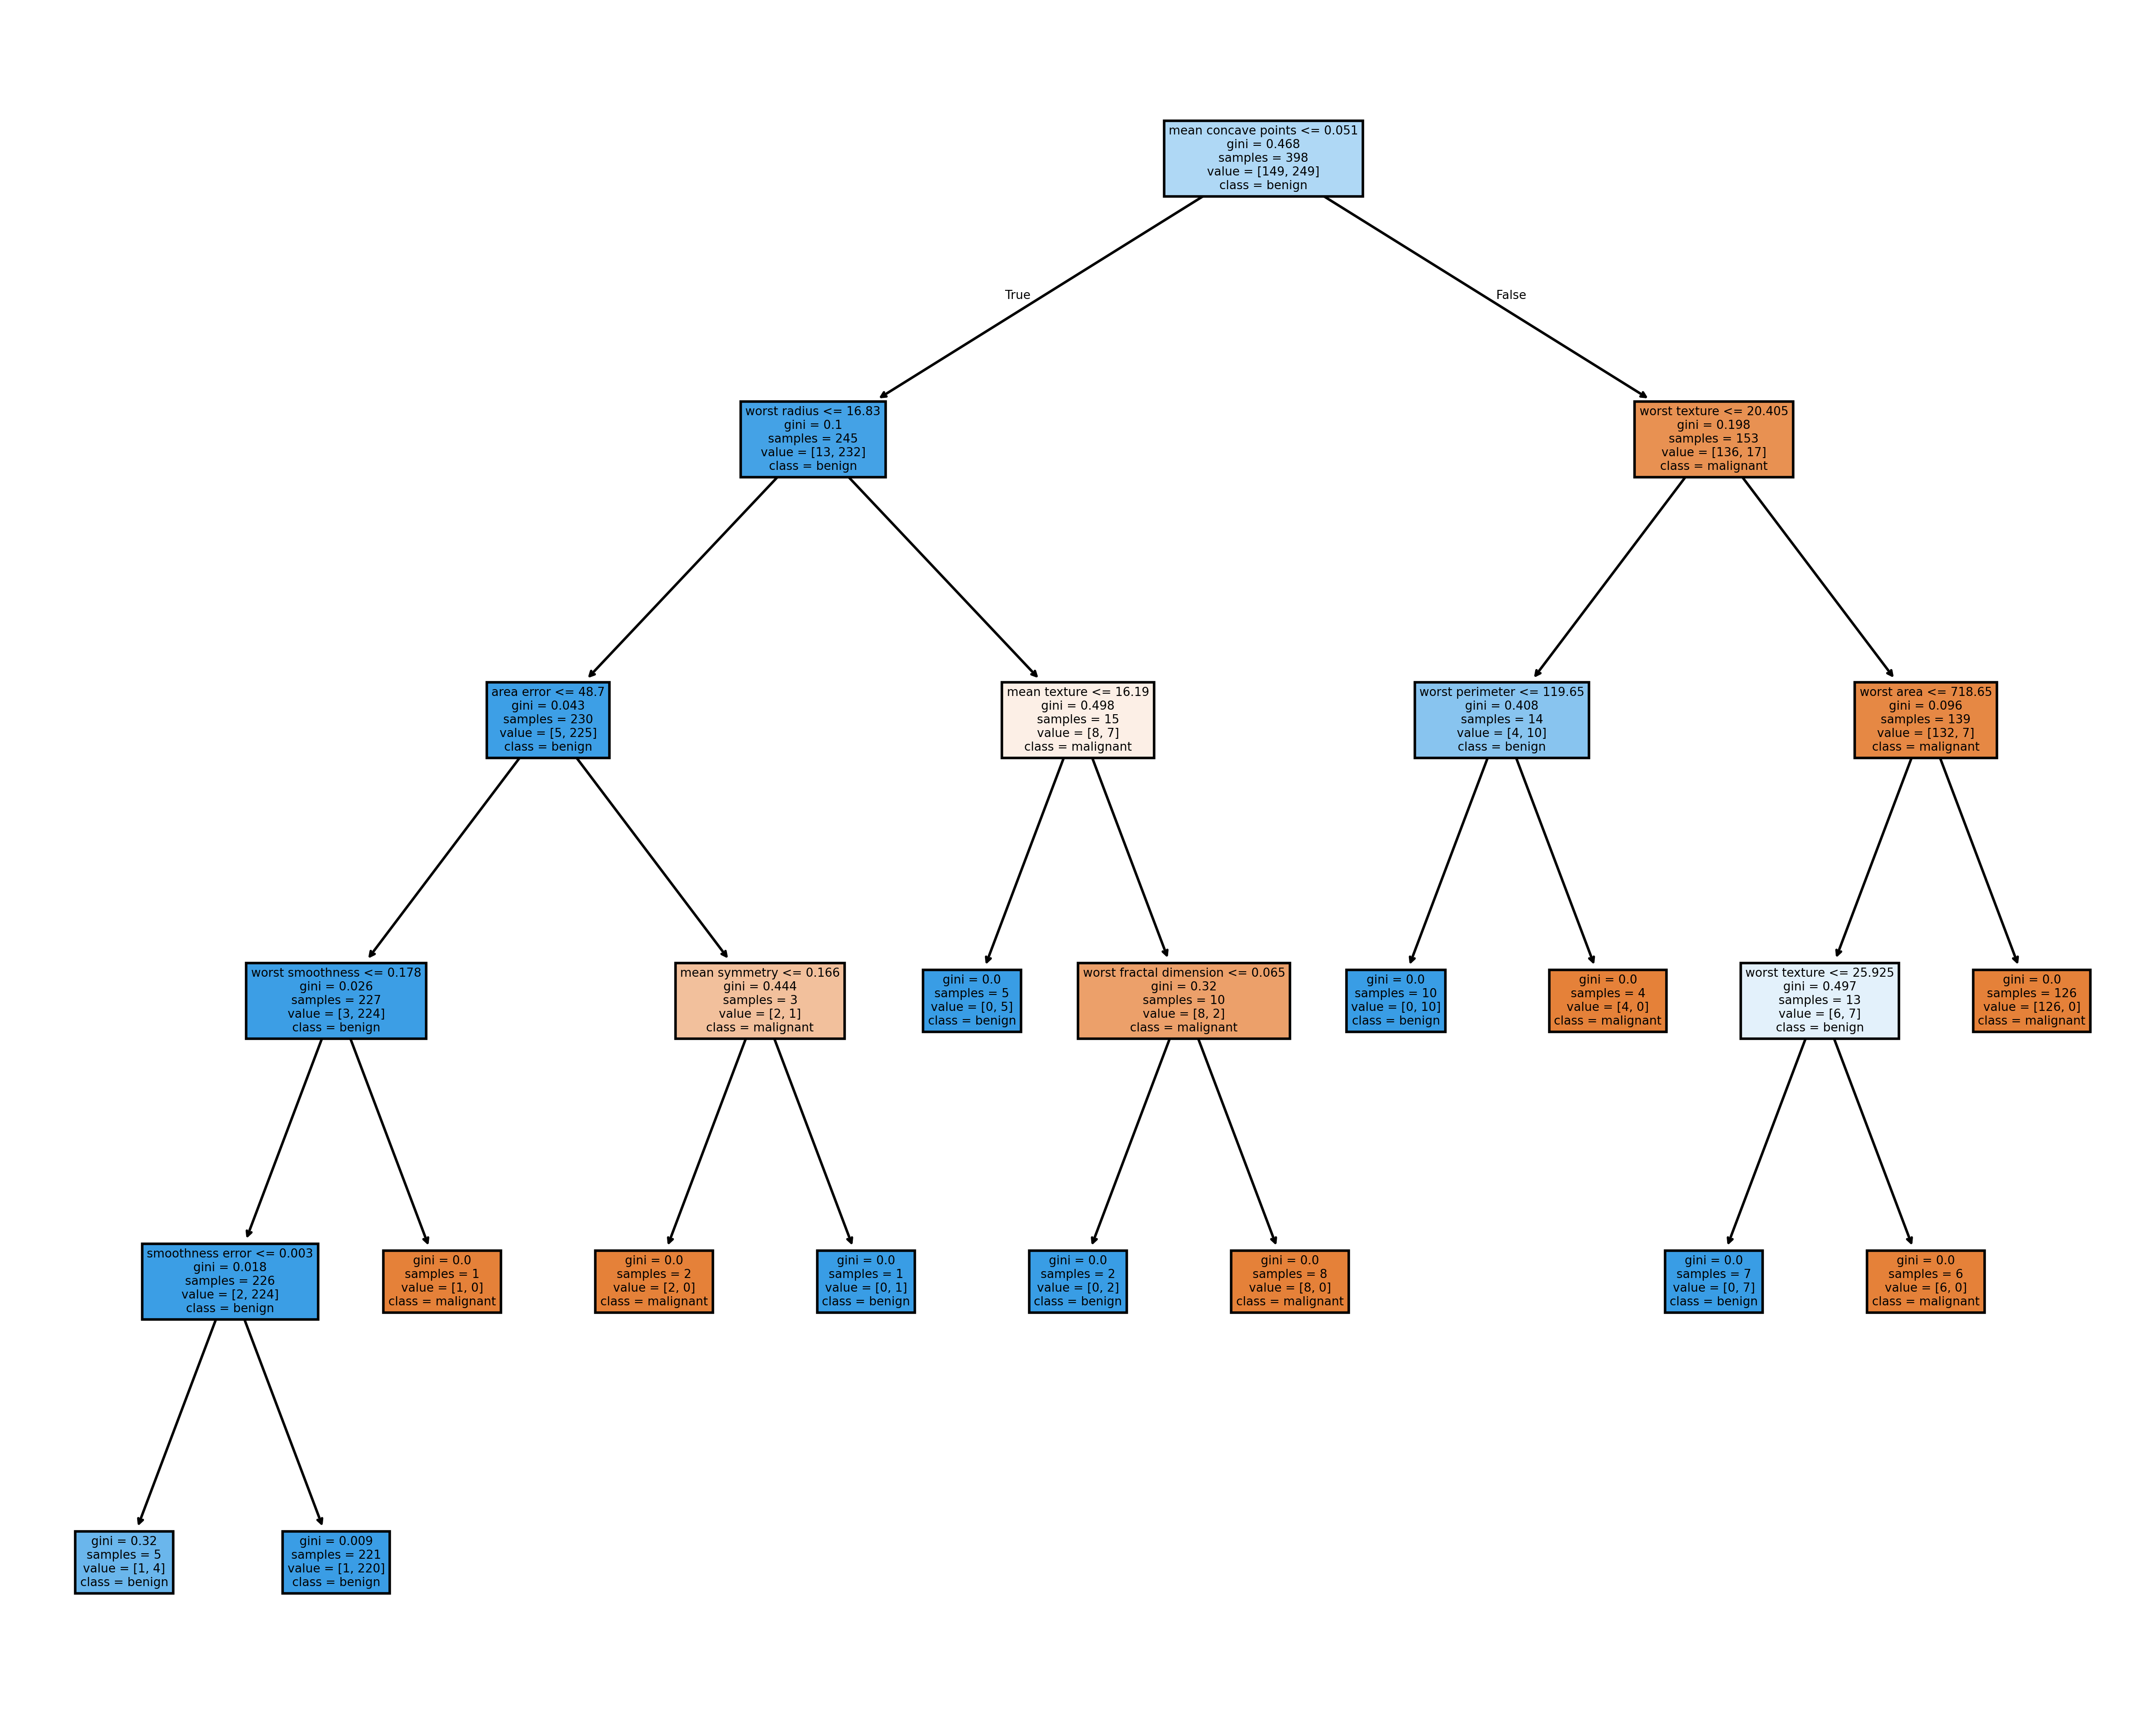

In [ ]:
plt.figure(figsize=(15,12), dpi=400)
plot_tree(model, filled=True, feature_names=X.columns, class_names=dataset.target_names)
plt.show()

### Modelos Black Box

In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
shap_values

array([[-2.53180779e-02,  2.14224419e-02, -1.00984065e-02, ...,
         1.08754317e+00,  6.52031985e-02, -1.09836075e-03],
       [-3.80261400e-02, -9.39265013e-02, -9.29234524e-03, ...,
        -1.90874502e+00,  5.51587832e-02, -1.14623636e-02],
       [-5.23732967e-02, -4.61781771e-02, -2.11701896e-02, ...,
        -9.23735207e-01,  3.64711565e-02, -6.14785345e-03],
       ...,
       [-2.81712640e-02,  1.99554619e-02, -1.50860158e-02, ...,
         1.08853212e+00,  9.04468732e-02, -1.09836075e-03],
       [ 3.05724997e-03, -2.82210546e-01, -7.74298532e-03, ...,
        -1.87033935e+00, -2.98304348e-01,  1.67448730e-04],
       [-2.81147151e-02,  2.57859412e-01, -1.54752377e-02, ...,
        -1.93907728e+00,  9.43667708e-02, -4.33453266e-04]])

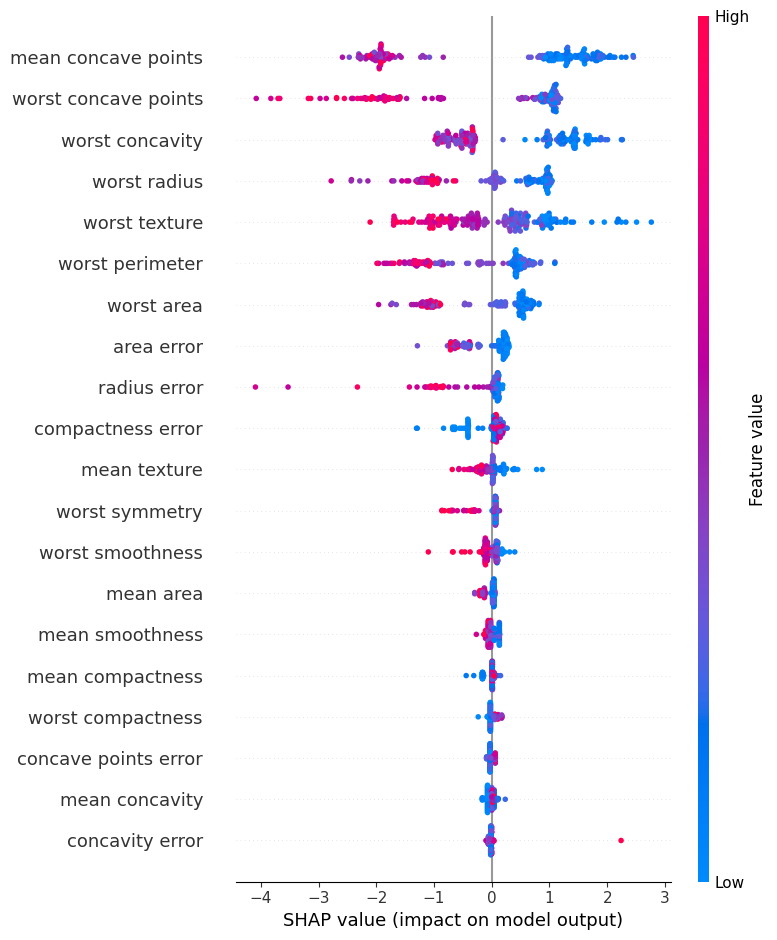

In [ ]:
shap.summary_plot(shap_values, X_test)

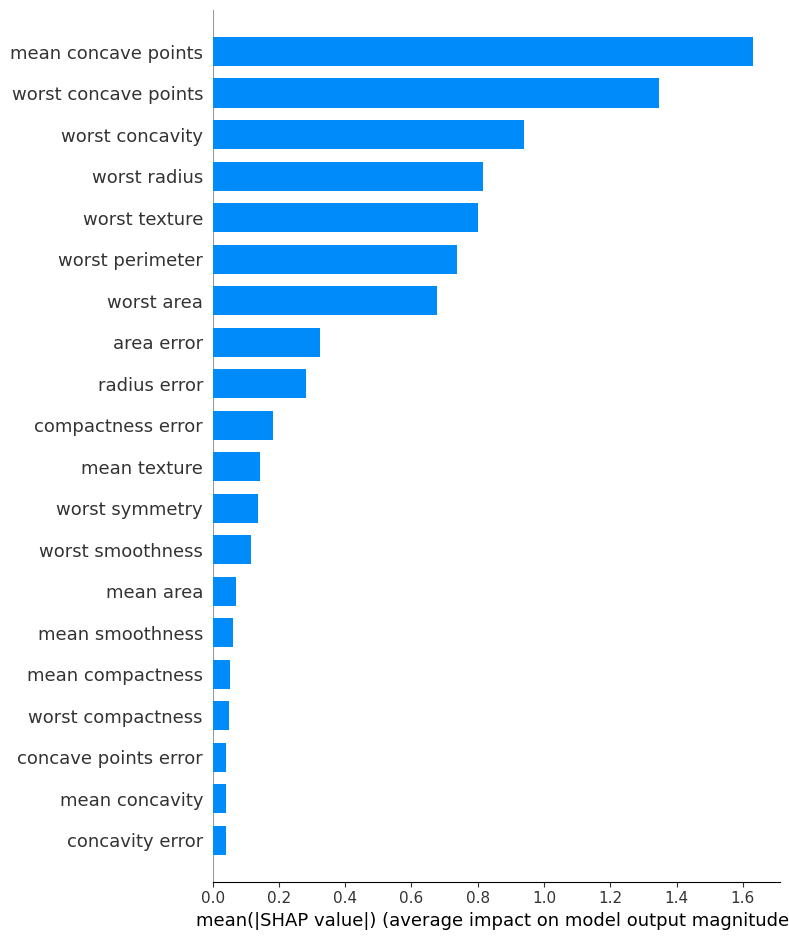

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")